## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [453]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [454]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
allmales = {}
allfemales = {}
allmales['all'] = pd.read_excel(url+'pinc08_2_1_1.xls', header = 9)
allmales['white'] = pd.read_excel(url+'pinc08_2_1_4.xls', header = 9)
allmales['black'] = pd.read_excel(url+'pinc08_2_1_6.xls', header = 9)
allmales['asian'] = pd.read_excel(url+'pinc08_2_1_8.xls', header = 9)
allmales['hispanic'] = pd.read_excel(url+'pinc08_2_1_9.xls', header = 9)

allfemales['all'] = pd.read_excel(url+'pinc08_3_1_1.xls', header = 9)
allfemales['white'] = pd.read_excel(url+'pinc08_3_1_4.xls', header = 9)
allfemales['black'] = pd.read_excel(url+'pinc08_3_1_6.xls', header = 9)
allfemales['asian'] = pd.read_excel(url+'pinc08_3_1_8.xls', header = 9)
allfemales['hispanic'] = pd.read_excel(url+'pinc08_3_1_9.xls', header = 9)

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [455]:
#allfemales and allmales should be dictionaries
type(allfemales)
type(allmales)

dict

In [456]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [457]:
#checking the type of object in allfemales
allfemales['all'].dtypes

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [458]:
#checking the type of object in allmales
allmales['all'].dtypes

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [459]:
# Converting column data into numerical values 
for i in allmales:
    allfemales[i]['Median income'] = pd.to_numeric(allfemales[i]['Median income'], errors='coerce')
    allfemales[i]['Mean income'] = pd.to_numeric(allfemales[i]['Mean income'], errors='coerce')
    allfemales[i]['Gini ratio'] = pd.to_numeric(allfemales[i]['Gini ratio'], errors='coerce')
    allmales[i]['Median income'] = pd.to_numeric(allmales[i]['Median income'], errors='coerce')
    allmales[i]['Mean income'] = pd.to_numeric(allmales[i]['Mean income'], errors='coerce')
    allmales[i]['Gini ratio'] = pd.to_numeric(allmales[i]['Gini ratio'], errors='coerce')

# Descriptive phase: 


In [460]:
#at this point it is a good idea to see if we can plot some data.
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

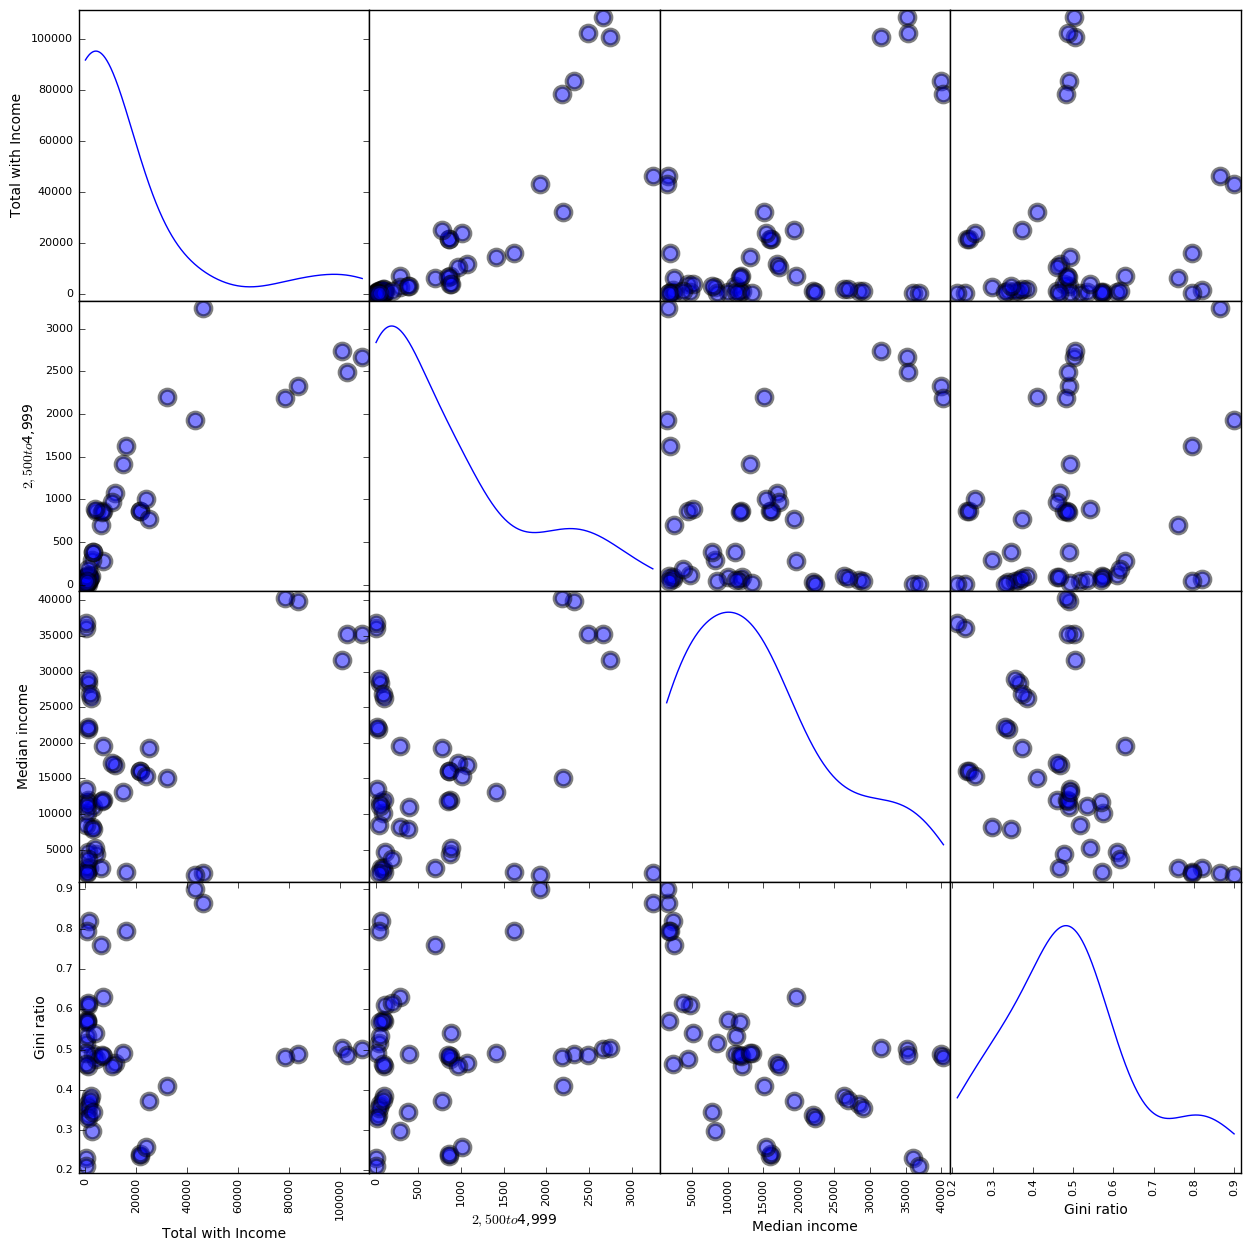

In [461]:
fig = pd.scatter_matrix(allmales['all'][[u'Total with Income',u'$2,500 to $4,999', u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')                

### Figure 1: 4 x 4 Scatter matrix of Total with income vs income b/w 2500 and 4999 dollars vs Median Income vs Gini Ratio for males of all races. The diagonal elements of the matrix represent the kernel density estimation of the respective plots.

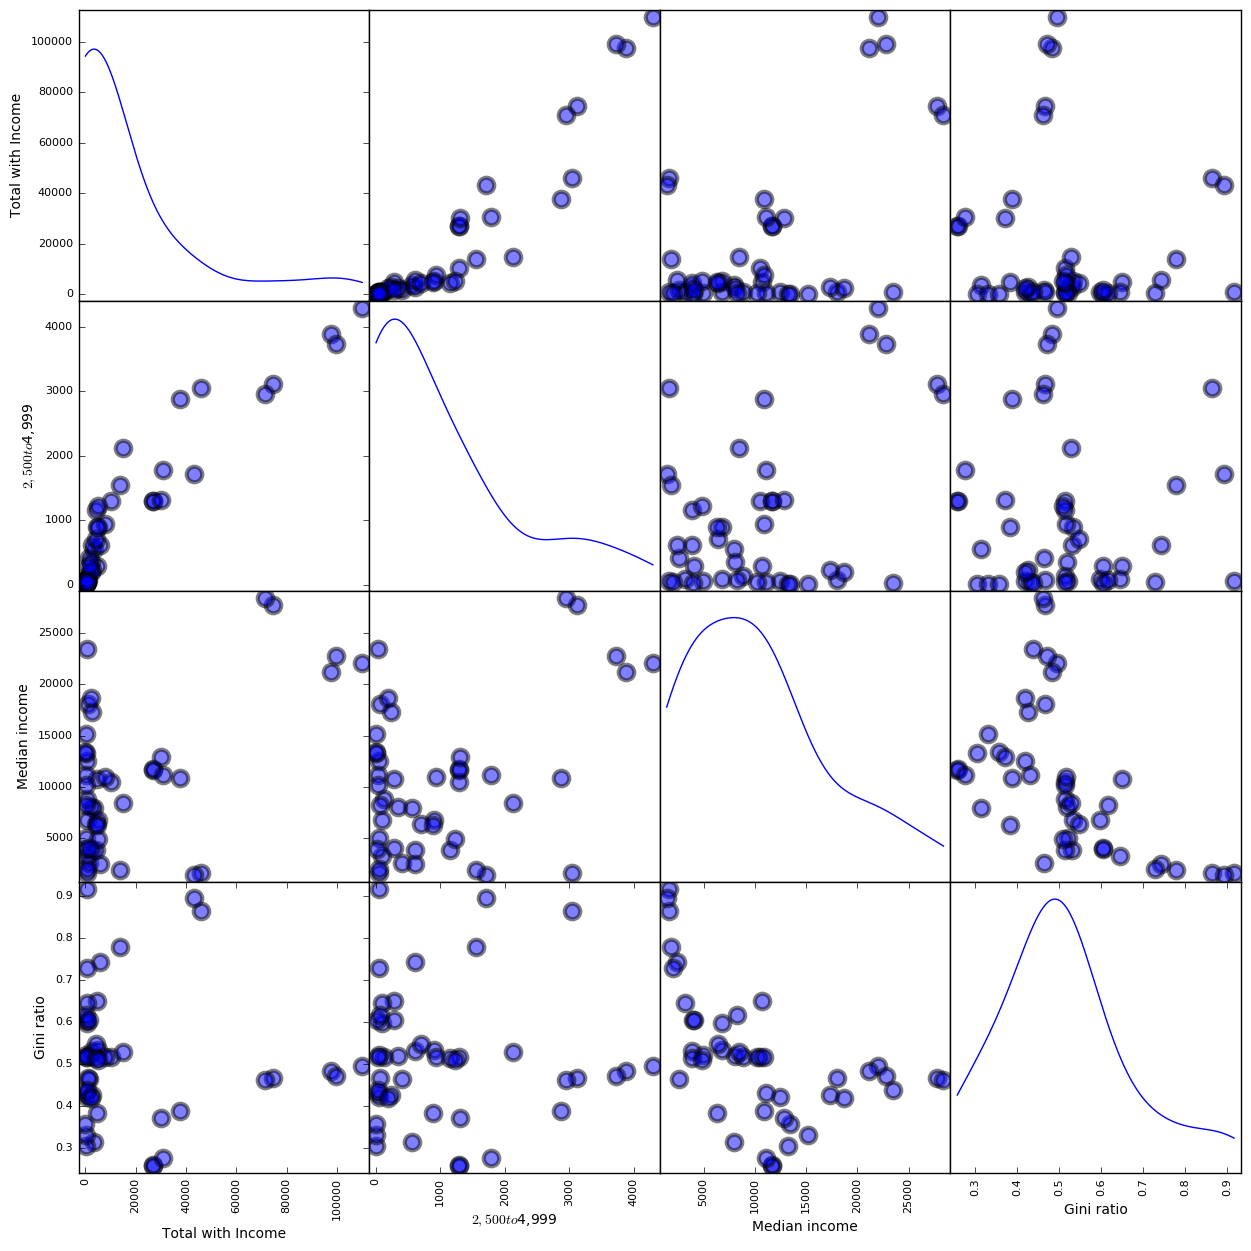

In [462]:
fig = pd.scatter_matrix(allfemales['all'][[u'Total with Income',u'$2,500 to $4,999', u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')                

### Figure 2: 4 x 4 Scatter matrix of Total with income vs income b/w 2500 and 4999 dollars vs Median Income vs Gini Ratio for females of all races. The diagonal elements of the matrix represent the kernel density estimation of the respective plots.

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

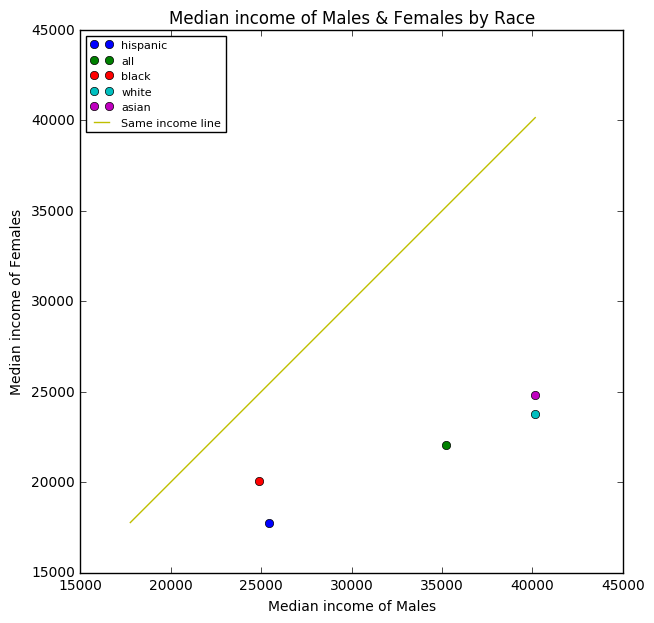

In [463]:
plt.figure(figsize=(7,7))
x = []
y = []
for i in allmales:
    x.append(allmales[i]['Median income'][1])
    y.append(allfemales[i]['Median income'][1])
    plt.plot(allmales[i]['Median income'][1],allfemales[i]['Median income'][1],'o', label = i)
    
    
xy = np.arange(min(y), max(x), 0.1)
plt.plot(xy, xy, label='Same income line')
plt.xlabel('Median income of Males')
plt.ylabel('Median income of Females')
plt.title('Median income of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)


# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [464]:
#Creating all_males and all_females columns
all_males=np.array([allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([allfemales[k]['Median income'][1] for k in ['all', 'white', 'black','hispanic','asian']])
data = pd.DataFrame([list(all_males),list(all_females)])

data_1 = data.T
data_1.columns = ["all_males", "all_females"]
data_1

,all_males,all_females
0,35228.0,22063.0
1,40122.0,23780.0
2,24855.0,20044.0
3,25411.0,17762.0
4,40153.0,24840.0


In [465]:
# Calculating analytically
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(10485.951073192851, 0.33817688852581446)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

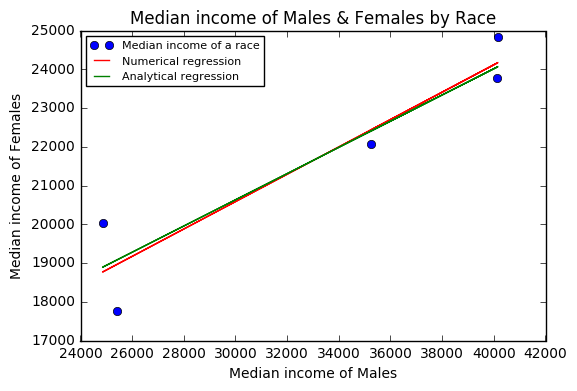

In [466]:
#Calculating using regression method if library and plotting
lm = smf.ols(formula='all_females ~ all_males', data = data_1).fit()
plt.plot(all_males, all_females, 'o', label = 'Median income of a race')
plt.plot(all_males,lm.predict(),'r-', label = 'Numerical regression')
plt.plot(all_males, beta0 + beta1 * all_males, label = 'Analytical regression')
plt.xlabel('Median income of Males')
plt.ylabel('Median income of Females')
plt.title('Median income of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [467]:
(allmales['white'].loc[:,['Median income']]).values.flatten()

array([    nan,  40122.,  44882.,  45554.,  20445.,   3737.,  16625.,
         8381.,   1662.,  10759.,  10599.,  12494.,   4262.,   4915.,
         1730.,   1463.,   1943.,   2471.,  17434.,  11920.,  29225.,
        22025.,  26812.,  37187.,   8374.,  11884.,  12174.,  17446.,
        11798.,  29375.,  22590.,  26868.,  37724.,  13975.,     nan,
         2579.,   5336.,   4076.,   1772.,     nan,  35621.,  39531.,
        16698.,  20481.,  16561.,   7988.,  16272.,  14924.,     nan])

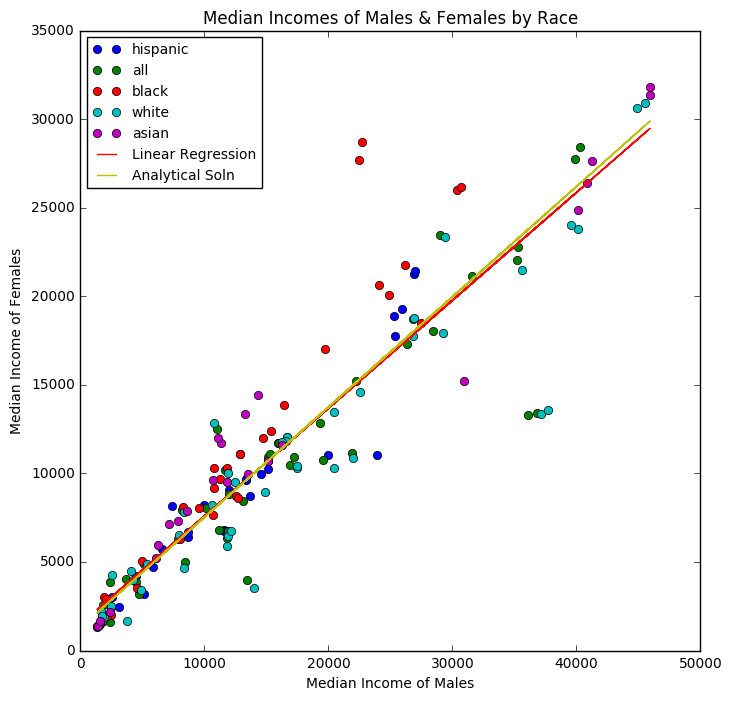

In [468]:
X = []
Y = []
plt.figure(figsize=(8,8))
for i in allmales:
    x = (allmales[i].loc[:,['Median income']]).values.flatten()
    y = (allfemales[i].loc[:,['Median income']]).values.flatten()
    mask = ~(np.isnan(x) + np.isnan(y))
    X.extend(x[mask])
    Y.extend(y[mask])
    plt.plot(x[mask], y[mask], 'o', label = i)
    
data_2 = pd.DataFrame([list(X), list(Y)])  
data_2 = data_2.T
data_2.columns = ["X", "Y"]
data_2
lm = smf.ols(formula='Y ~ X', data = data_2).fit()

cor = stats.spearmanr(X, Y)
beta1 = cor[0] * np.array(Y).std() / np.array(X).std()
beta0 = np.array(Y).mean() - beta1 * np.array(X).mean()
beta0, beta1

plt.plot(X,lm.predict(),'r-', label='Linear Regression')
plt.plot(X, beta0 + beta1 * np.array(X), label='Analytical Soln')


plt.xlabel('Median Income of Males')
plt.ylabel('Median Income of Females')
plt.title('Median Incomes of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 10)


## Figure 3: As observed by the plot, the linear regression line fit (numerical solution) is almost similar to the analytical solution. The minor differences in the lines is possibly due to  numerical errors such as round off errors.

## The outliers with extremes on the x axis which are the points where x = 37500 (approx)  and y  = 14000 (approx), hence these are high leverage points.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



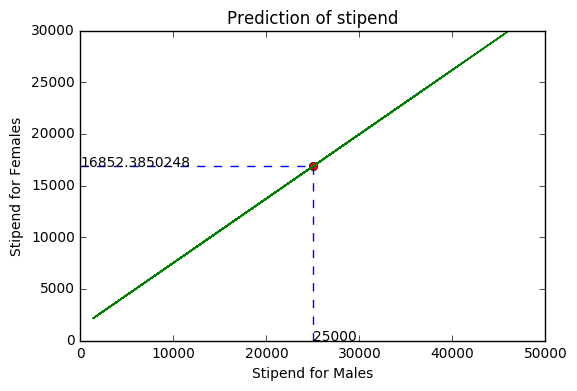

In [469]:
x = 25000
y = beta0 + beta1 * x
plt.plot(x,y, 'or')
plt.plot(np.array(X), beta0 + beta1 * np.array(X), '-g')
plt.plot([0,x], [y,y], '--b')
plt.plot([x,x], [0,y], '--b')
plt.text(x, 0, x)
plt.text(0, y, y)
plt.legend(loc = 'best', fontsize = 8)
plt.xlabel('Stipend for Males')
plt.ylabel('Stipend for Females')
plt.title('Prediction of stipend')

## If the ideal stipend of the male is 25000 dollars then a women will recieve a stipend of 16852 dollars

# 7. lastly do you have any comments about what these data tell us about race? 

Observing the data, it can be concluded that the there is a disparity of income across races (considering the median income)
Male: Asian > White > Hispanic > Black
Female: Asian > White > Black > Hispanic

A better indicator will be to analyze the other possible factors that influence the wages such as education, skillset and industry wherein the majority of people from that race are working